# What if in Python

# 12.4 : Mô hình cấu trúc biên 

### BS. Lê Ngọc Khả Nhi


# Giới thiệu

"What if" hay "The Causal Inference book" của Jamie Robins và Miguel Hernan là một tác phẩm rất hay và có thể dùng như một giáo trình về chuyên đề Suy luận nhân quả. Trong bài này Nhi sử dụng ngôn ngữ Python để minh họa cho Chương 12. Nhi có tham khảo code của James Fiedler https://github.com/jrfiedler/causal_inference_python_code ; với một số thay đổi, thí dụ dùng lập trình hàm thay vì code thủ công và dùng nhiều biểu đồ hơn.

Mục 12.4 trong chương 12 quyển What If giới thiệu về mô hình cấu trúc biên (Marginal structural model, MSM) cho phép ước lượng giá trị trung bình biên (marginal mean) của kết quả phản thực tế (counterfactual outcome) cho một can thiệp nhị phân A.

Xét một thí nghiệm nhằm khảo sát giá trị trung bình của kết cục lâm sàng Y dưới tác động của can thiệp điều trị $a$, với 2 khả năng : $a = 0$ và $a = 1$, bài toán này có thể được giải quyết thông qua một mô hình hồi quy tuyến tính:

$$E\left [ Y^{a} \right ] = \beta_{0} + \beta_{1}a$$

Hai tham số  $\beta_{1}$ và  $\beta_{0}$ trong mô hình MSM tương ứng với hiệu ứng nhân quả trung bình (Average causal effect). Trong đó, tham số $\beta_{1}$ tương ứng với $E\left [Y^{a=1} \right] - E\left [Y^{a=0} \right] $ vì khi a = 0, $E\left [ Y^{a} \right ] = \beta_{0}$, và khi a = 1 thì $E\left [ Y^{a} \right ] = \beta_{0} + \beta_{1}a$.

Tuy nhiên, có một vấn đề ở đây, đó là trên thực tế, cho mỗi bệnh nhân ta chỉ có thể quan sát được 1 trong 2 khả năng, a=0 (không được điều trị) hoặc a=1 (được điều trị), nhưng không bao giờ quan sát được cả 2. Đây là vấn đề Counterfactual (tạm dịch: phản thực tế). Vấn đề này là độc lập với cỡ mẫu, và là yếu tố chủ chốt phân biệt Suy diễn thống kê và Suy diễn nhân quả, vì với suy diễn thống kê, ta có thể hy vọng tăng cỡ mẫu để tối ưu độ chính xác của suy luận, nhưng với suy diễn nhân quả, dù ta có nhiều dữ liệu đến đâu, vẫn không thể quan sát được giá trị phản thực tế. Do đó, điểm thú vị của mô hình MSM đó là nó không được khớp (fit) trên dữ liệu thực tế nhưng sử dụng dữ liệu ảo, kế thừa từ phương pháp IPW mà chúng ta đã học trong bài trước.

 # Bài toán minh họa

Ta trở lại với thí dụ minh họa dùng trong sách. Như 2 bài trước, ta dùng bộ dữ liệu National Health and Nutrition Examination Survey (NHEFS).

Các bạn tải dữ liệu từ đây:
https://cdn1.sph.harvard.edu/wp-content/uploads/sites/1268/2017/01/nhefs_excel.zip

Sau khi tải về, các bạn giải nén để có file excel: NHEFS.xls, đặt file này vào cùng thư mục với notebook để làm thí nghiệm.

Nhắc lại về bối cảnh của bài toán, ta thực hiện nghiên cứu nhằm xác minh liệu bỏ hút thuốc lá có gây thay đổi tích cực về cân nặng trong thời gian 10 năm hay không ? Trong dữ liệu ta có biến kết quả là wt82_71 chỉ giá trị thay đổi cân nặng giữa năm 1982 và 1971, và một số biến khác có vai trò can thiệp nhị phân, can thiệp định lương hay confounders.

Trong bài trước, bằng cách dùng phương pháp trọng số nghịch đảo xác suất (IPW), ta đã ước tính được giá trị của tham số $\beta_{1}$ hay hiệu ứng nhân quả trung bình của can thiệp A (bỏ hút thuốc) đối với kết quả Y (thay đổi cân nặng):

$\beta_{1} = E\left [Y^{a=1} \right] - E\left [Y^{a=0} \right] $

Khi dùng IPW, ta tạo ra một quần thể ảo, sau đó khớp mô hình tương quan $E\left [Y|A \right] = \theta_{0} + \theta_{1}A$ trên dữ liệu ảo này. Trong quần thể ảo, ta có thể giả định *Tương quan đồng nghĩa với liên hệ Nhân quả*, tức là tham số $\theta_1$ trong mô hình tương quan có thể được xem như tương đương với tham số $\beta_1$ trong mô hình cấu trúc. 

Trong thí dụ trên, mô hình MSM là bão hòa, vì can thiệp cai thuốc lá A là một biến nhị phân. Tức là, mô hình có 2 ẩn ở cả hai vế của phương trình: $E\left [Y^{a=1} \right]$ và $E\left [Y^{a=0} \right] $ ở vế trái và $\beta_{0}$, $\beta_{1}$ ở vế phải, dữ liệu trong quần thể ảo là đủ để ước lượng hiệu ứng nhân quả. 

Tuy nhiên, khi can thiệp trị liệu là biến liên tục hoặc đa giá trị, thí dụ can thiệp đo bằng số điếu thuốc lá tiêu thụ hằng ngày, bài toán sẽ khó khăn hơn vì trạng thái mô hình bão hòa ở tất cả bậc giá trị có thể của A gần như bất khả thi. Lúc này, ta có thể dùng phương pháp Trọng số nghịch đảo xác suất ổn định (SIPW) như trong mục 12.3 thay cho IPW đơn giản. 

Trong mục 12.4 này, ta sẽ dùng mô hình MSM giải quyết bài toán khảo sát hiệu ứng nhân quả của can thiệp định lượng A là sự thay đổi mức độ tiêu thụ thuốc lá, biến smkintensity82_71, giới hạn trong 1 nhóm nhỏ những cá thể hút ít hơn 25 điếu/ngày ở thời điểm ban đầu (năm 1971).

Trước hết Nhi viết hàm để chuẩn bị nhanh dữ liệu cho thí nghiệm

In [210]:
import warnings
warnings.filterwarnings('ignore')

# Dataframe và random

import numpy as np
import pandas as pd

# Stats
import scipy

# Đồ họa
import matplotlib.pyplot as plt
import seaborn as sns

# GLM
from patsy import dmatrices
import statsmodels.formula.api as smf
import statsmodels.api as sm

from collections import OrderedDict

from statsmodels.regression._prediction import get_prediction

In [187]:
def quick_data_prep(file_name: str) -> pd.DataFrame :
    
    df = pd.read_excel(file_name)
    
    check_cols = ['sex', 'age', 'race', 'wt82', 
             'ht', 'school', 'alcoholpy', 
             'smokeintensity']
    
    na_mask = df[check_cols].isna().any(axis=1)
    df_1 = df.loc[~na_mask]
    
    for col in ['age', 'wt71', 'smokeintensity', 'smokeyrs']:
        df_1[f'{col}_2'] = df_1[col] ** 2
        
    df2 = pd.concat([df_1] + [pd.get_dummies(df_1[col], prefix = col[:3])
                 for col in ['education','exercise','active']],
                    axis = 1)
    
    sub_df = df2.loc[df2.smokeintensity <= 25]
    
    cols = ['wt82_71',
            'smkintensity82_71',
            'sex','race',
            'edu_2','edu_3','edu_4','edu_5',
            'exe_1','exe_2',
            'act_1','act_2',
            'age','age_2',
            'wt71','wt71_2',
            'smokeintensity','smokeintensity_2',
            'smokeyrs','smokeyrs_2','seqn']
    
    sub_df = sub_df[cols]
    
    sub_df.reset_index(inplace = True, drop =True)
        
    return sub_df

In [188]:
sub_df = quick_data_prep('NHEFS.xls')

sub_df

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,wt82_71,smkintensity82_71,sex,race,edu_2,edu_3,edu_4,edu_5,exe_1,exe_2,...,act_2,age,age_2,wt71,wt71_2,smokeintensity,smokeintensity_2,smokeyrs,smokeyrs_2,seqn
0,2.604970,-10,0,0,1,0,0,0,0,0,...,0,36,1296,58.63,3437.4769,20,400,24,576,235
1,9.414486,-14,1,1,1,0,0,0,0,1,...,0,56,3136,56.81,3227.3761,20,400,26,676,244
2,4.990117,4,0,1,0,0,0,0,0,1,...,0,68,4624,59.42,3530.7364,3,9,53,2809,245
3,4.989251,0,0,0,1,0,0,0,1,0,...,0,40,1600,87.09,7584.6681,20,400,19,361,252
4,4.419060,10,1,1,1,0,0,0,1,0,...,0,43,1849,99.00,9801.0000,10,100,21,441,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,-2.949209,0,1,0,0,0,0,1,1,0,...,0,64,4096,51.03,2604.0609,6,36,30,900,25005
1158,2.159046,2,0,0,0,0,0,0,1,0,...,0,42,1764,54.54,2974.6116,8,64,29,841,25010
1159,8.500028,0,1,0,0,0,0,0,0,0,...,0,47,2209,84.94,7214.8036,20,400,31,961,25013
1160,3.514970,0,1,0,0,0,0,0,0,0,...,0,47,2209,57.72,3331.5984,20,400,31,961,25016


Trong bài toán này, yếu tố can thiệp là sự thay đổi cường độ hút thuốc, được đo bằng cách lấy số điếu thuốc hút mỗi ngày vào năm 1982 trừ đi số điếu thuốc hút mỗi ngày ở thời điểm ban đầu năm 1971. Như vậy A là biến định lượng và có thể nhận nhiều giá trị là số âm hoặc dương: thí dụ -25 nếu một cá nhân giảm số lượng thuốc lá hút hàng ngày đi 25, 40 nếu một cá nhân tăng số lượng thuốc lá hàng ngày của mình lên 40. 

Ta muốn ước tính hiệu ứng nhân quả của can thiệp này, tức là ước lượng sự thay đổi cân nặng trung bình $E\left [Y^{a} \right] - E\left [Y^{a'} \right]$ cho bất kì giá trị a và a'có thể nào của A. Vì A có thể nhận hàng chục giá trị, một mô hình ở trạng thái bão hòa với nhiều tham số trở nên không thực tế. 

Chúng ta sẽ phải xem xét một mô hình cấu trúc không bão hòa để dựng nên một đồ thị liều/đáp ứng cho phép ước lượng hiệu ứng của A trên kết quả trung bình E.

Ta có thể hình dung về đường cong Liều/đáp ứng này bằng cách thăm dò dữ liệu: vẽ đường hồi quy giữa biến phụ thuộc wt82_71 và biến độc lập smkintensity82_71, đồ thị có hình ảnh một đường parabol, gợi ý rằng liên hệ giữa wt82_71 (Y) và smkintensity82_71 (A) có thể được mô hình hóa bằng 1 hàm bậc 2. Như vậy mô hình cấu trúc biên của chúng ta có công thức:

$$E\left [ Y^{a} \right ] = \beta_{0} + \beta_{1}a + \beta_{2}a^{2}$$ 

Trong đó $\beta_{0}$ là thay đổi cân nặng trung bình dưới điều kiện a = 0 (không có thay đổi nào về mức tiêu thụ thuốc lá trong 10 năm).

[]

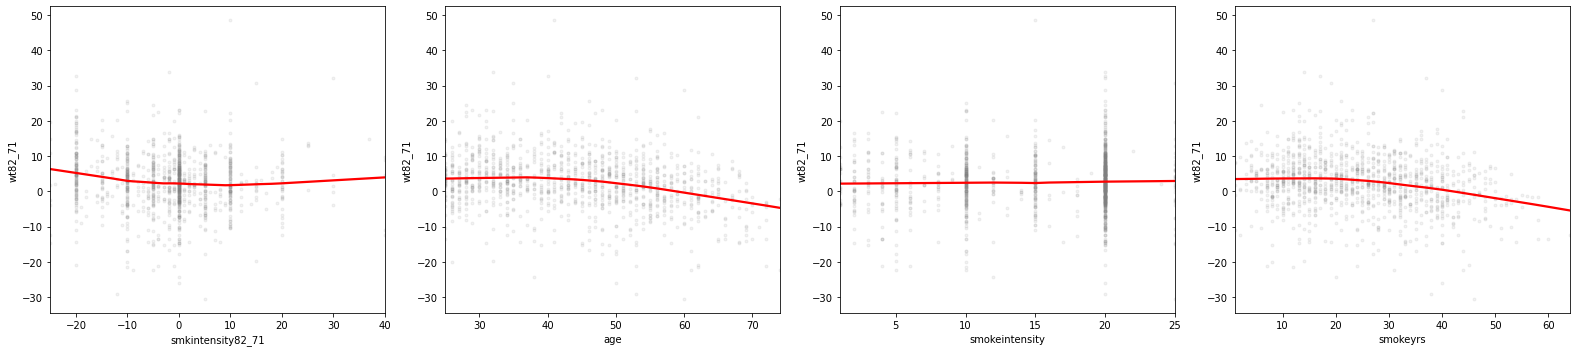

In [189]:
quant_confounders = ['smkintensity82_71', 'age', 'smokeintensity','smokeyrs',]

fig, axs = plt.subplots(ncols=len(quant_confounders), figsize=(22,5))

for i,v in enumerate(quant_confounders):
    g = sns.regplot(x = v,
                    y = 'wt82_71',
                    lowess = True,
                    data = sub_df,
                    marker = ".",
                    scatter_kws={'alpha':0.1, 'color':'grey'},
                    line_kws = {'color': 'red'},
                    ax = axs[i])
plt.tight_layout()
plt.plot()

# Giải thích quy trình 

Giả sử ta muốn ước tính hiệu ứng nhân quả trung bình của việc tăng cường độ hút thêm 20 điếu mỗi ngày, giá trị sẽ là $E\left [Y^{a = 20} \right] - E\left [Y^{a=0} \right]$;

Sử dụng mô hình cấu trúc nói trên, ta có:

$E\left [ Y^{a=20} \right ] = \beta_{0} + 20\beta_{1} + 400\beta_{2}$

Và $E\left [ Y^{a=20} \right ] - E\left [ Y^{a=0} \right ]  =   20\beta_{1} + 400\beta_{2}$

Như vậy, muốn đạt được mục tiêu ta cần đi tìm 2 tham số $\beta_{1}$ và $\beta_{2}$

Để làm việc này, trước hết ta cần dùng phương pháp Trọng số nghịch đảo xác suất ổn định (SIPW) để ước tính những trọng số $SW^{A}$, cho phép dựng nên 1 quần thể ảo trong đó tác động của những yếu tố gây nhiễu (counfounders) L xem như đã bị triệt tiêu. Sau đó, ta khớp mô hình tương quan $E\left [ Y^{a} \right ] = \theta_{0} + \theta_{1}A + \theta_{2}A^{2}$ trên dữ liệu quần thể ảo này.

Để ước tính trọng số nghịch đảo xác suất ổn định $SW^{A} = f(A) / f(A|L)$ ta cần ước tính $f(A|L)$, hay chính là propensity score của can thiệp A. Khi can thiệp A là một biến nhị phân, $f(A|L)$ là xác suất nhận can thiệp tùy thuộc giá trị các counfounders L, ta có thể dùng mô hình logistic (hoặc bất cứ mô hình machine learning nào thuộc loại binary classification) để ước tính $Pr[A = 1|L]$; nhưng khi A là biến liên tục, $f(A|L)$ lại là 1 hàm PDF (mật độ xác suất), rất khó ước tính chính xác - do đó việc dùng IPW cho can thiệp định lượng có nhiều nguy cơ. 

Trong thí dụ này, ta giả định f(A|L) là hàm PDF cho phân phối chuẩn (Gaussian), với trung bình $\mu_{L} = E[A|L]$ và phương sai $\sigma{2}$ hằng định. Từ đó, ta có thể sử dụng 1 mô hình hồi quy tuyến tính để ước tính  trung bình $E[A|L]$ và phương sai của phần dư $\sigma{2}$ cho tất cả các tổ hợp giá trị của L. Ta cũng giả định rằng mật độ xác suất $f(A)$ trong tử số của $SW^{A}$ có phân phối chuẩn.

# Triển khai trong Python

Nhi viết hàm stab_ipw để ước tính $SW^{A}$, hàm này nhận công thức (string) có dạng A ~ f(L) với A là tên biến can thiệp (định lượng), L là các biến counfounders. 

Hàm này sẽ lần lượt ước tính mẫu số $f(A|L)$ hay propensity score và tử số $f(A)$, từ đó tính được trọng số nghịch đảo xác suất ổn định sw có dạng 1 numpy array, sau đó xuất kết quả sw, dataframe A (để dùng cho bước tiếp theo: dựng mô hình SMS).

In [204]:
def stab_ipw(form: str):
    
    # Bước 1: Tính propensity score f(A|L)
    
    A,X = dmatrices(form,  
                data = sub_df,
                return_type='dataframe')
    
    A = pd.Series(A.values.flatten(), dtype = 'int')
    
    ols = sm.OLS(A, X)
    res = ols.fit()
    
    A_pred = res.predict(X) 
    
    fAL = scipy.stats.norm.pdf(A, A_pred, np.sqrt(res.mse_resid))
    
    # Tính f(A)
    fA = scipy.stats.norm.pdf(A, A.mean(), A.std())
    
    sw = fA / fAL
    
    return A,sw

Ta thi hành hàm này với công thức như sau:

In [205]:
form = 'smkintensity82_71 ~ 1 + sex + race + \
        edu_2 + edu_3 + edu_4 + edu_5 + \
        exe_1 + exe_2 + \
        act_1 + act_2 + \
        age + age_2 + \
        wt71 + wt71_2 + \
        smokeintensity + smokeintensity_2 + \
        smokeyrs + smokeyrs_2'

A,sw = stab_ipw(form)

Đây là hàm mật độ xác suất của can thiệp A:

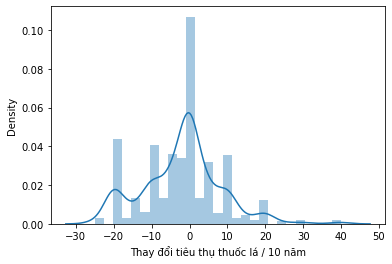

In [206]:
sns.distplot(A.values)
plt.xlabel('Thay đổi tiêu thụ thuốc lá / 10 năm')
plt.show()

In [207]:
A.mean(), A.std()

(-2.057659208261618, 10.467830908151853)

Tiếp theo, Nhi viết hàm marg_struct_model để ước tính các tham số beta trong mô hình SMS, cũng chính là hiệu ứng nhân quả cần ước lượng, hàm này nhận dữ liệu đầu vào gồm biến kết quả y, array giá trị can thiệp A, array trọng số SW, và array grp là biến sub_df.seqn

In [200]:
def marg_struct_model(y: pd.Series, 
                      A: pd.DataFrame,
                      sw : np.array, 
                      grp: pd.Series):
    
    # Tạo dataframe X với intercept = 1, A và A**2
    
    X = pd.DataFrame(OrderedDict((
    ('constant', np.ones(y.shape[0])),
    ('A', A),
    ('A^2', A**2))))
    
    # Fit mô hình
    sms_mod = sm.GEE(y,X,
                     groups=grp,
                     weights=sw)
    
    res = sms_mod.fit()
    
    return res

In [208]:
res = marg_struct_model(y = sub_df.wt82_71, 
                        A = A, 
                        grp = sub_df.seqn,
                        sw = sw)

In [209]:
res.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
constant,2.0045,0.295,6.792,0.000,1.426,2.583
A,-0.1090,0.032,-3.456,0.001,-0.171,-0.047
A^2,0.0027,0.002,1.115,0.265,-0.002,0.007


Kết quả này phù hợp với nội dung trình bày trong sách: Những giá trị tham số cho mô hình MSM ước lượng của bằng phương pháp SIPW lần lượt là $\hat{\beta_{0}} = 2.005$, $\hat{\beta_{1}} = -0.109$ và $\hat{\beta_{2}} = 0.003$.

In [212]:
pred_inputs = [
    [1, 0, 0],       # tiêu thụ thuốc lá không đổi : A = 0
    [1, 20, 20**2],  # A tăng 20 gói/ngày
]

pred = get_prediction(res, exog=pred_inputs)
summary = pred.summary_frame().round(1)
summary[["mean", "mean_ci_lower", "mean_ci_upper"]]
summary.index = ["A = 0", "A = +20"]
summary[["mean", "mean_ci_lower", "mean_ci_upper"]]

,mean,mean_ci_lower,mean_ci_upper
A = 0,2.0,1.4,2.6
A = +20,0.9,-1.7,3.5


Dựa vào giá trị ước lượng của các tham số $\hat{\beta_{0}}$, $\hat{\beta_{1}}$, $\hat{\beta_{2}}$ như trên, hiệu ứng nhân quả trung bình và khoảng tin cậy 95% của hiệu ứng này sẽ là 2 kg (1.4 đến 2.6) nếu người ta không thay đổi mức tiêu thụ thuốc lá (can thiệp = 0), và 0.9 kg  (-1.7 đến 3.5) nếu tất cả đối tượng đều hút thuốc nhiều hơn, tăng 20 điếu / ngày trong 10 năm. 

Bài thực hành đến đây là hết, tạm biệt các bạn.